# Hypothesis
This notebook is used to read the data from the pickle files and to test the hypothesis that in the age group of 60-70 the frequency of a sinus bradycardia is significantly higher than in the other age groups.
For that instance the chi-squared test is used.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sys


from scipy.stats import chi2_contingency
sys.path.append('../scripts')
import data_helper


In [2]:
data = data_helper.load_data(only_demographic=True)

print("Number of patients per category:")
for cat_name in data.keys():
    print(f"{cat_name}: {len(data[cat_name])}")

df_dgc = pd.DataFrame(data)

Reading GSVT
Reading AFIB
Reading SR
Reading SB
Number of patients per category:
age: 37011
diag: 37011
gender: 37011


In [15]:
# get number of patients in a diagnosis category
num_patients = df_dgc['diag'].value_counts()
print(f"Number of patients in a diagnosis category: {num_patients}")
# get min number of patients in a diagnosis category
min_num_patients = df_dgc['diag'].value_counts().min()
print(f"Min number of patients in a diagnosis category: {min_num_patients}")

# get the unique values of the diagnosis category
unique_vals = df_dgc['diag'].unique()
print(f"unique values in the diagnosis category: {unique_vals}")

# get random sample of patients for each diagnosis category with min number of patients
sampled_data = pd.DataFrame()
for val in unique_vals:
    sampled_data = pd.concat([sampled_data, df_dgc[df_dgc['diag'] == val].sample(min_num_patients)])


print(sampled_data['diag'].value_counts())

df_dgc = sampled_data

Number of patients in a diagnosis category: SB      15826
SR      10426
AFIB     9756
GSVT     1003
Name: diag, dtype: int64
Min number of patients in a diagnosis category: 1003
unique values in the diagnosis category: ['GSVT' 'AFIB' 'SR' 'SB']
GSVT    1003
AFIB    1003
SR      1003
SB      1003
Name: diag, dtype: int64


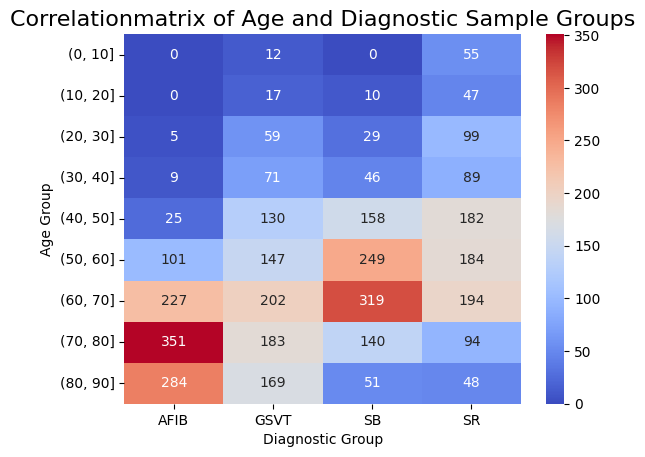

In [21]:
# Correlation matrix
corr_matrix_age_diag= pd.crosstab(df_dgc['age_group'], df_dgc['diag'])
# Plot the correlation matrix
sns.heatmap(corr_matrix_age_diag, annot=True, cmap='coolwarm', fmt='d')
plt.title('Correlationmatrix of Age and Diagnostic Sample Groups', fontsize=16)
plt.xlabel('Diagnostic Group')
plt.ylabel('Age Group')
plt.show()

In [16]:
# Change from group to category
age_categories = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df_dgc['age_group'] = pd.cut(df_dgc['age'], bins=age_categories)
corr_matrix_age_diag= pd.crosstab(df_dgc['age_group'], df_dgc['diag'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(corr_matrix_age_diag)

# Difference between observed and expected frequencies
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Check if SB (Sinusbradykardie) has a significantly higher frequency in the 60-70 age group
sb_60_70 = corr_matrix_age_diag.loc[pd.Interval(60, 70, closed='right'), 'SB']
sb_other = corr_matrix_age_diag.drop(pd.Interval(60, 70, closed='right')).sum()['SB']
total_60_70 = corr_matrix_age_diag.loc[pd.Interval(60, 70, closed='right')].sum()
total_other = corr_matrix_age_diag.drop(pd.Interval(60, 70, closed='right')).sum().sum()

# Frequency table for the specific Chi-Square test
observed = [[sb_60_70, total_60_70 - sb_60_70], [sb_other, total_other - sb_other]]
chi2_sb, p_sb = chi2_contingency(observed)[:2]


print(f"Chi-Square Statistic for SB in 60-70 vs others: {chi2_sb}")
print(f"P-value for SB in 60-70 vs others: {p_sb}")

Chi-Square Statistic: 1054.3796287658074
P-value: 2.4773868106437145e-207
Chi-Square Statistic for SB in 60-70 vs others: 49.305576225492736
P-value for SB in 60-70 vs others: 2.1903897342655923e-12


The results can be interpreted as followed:

- The first value returned is the Chi-Square Statistic that shows the difference between the observed and the expected frequencies. Here, a bigger number indicates a bigger difference. The p-value shows the probability of this difference being statistically significant. If the p-value is below the significance level of 0.05, the difference is significant.

- The Chi-Square Statistic for sinus bradycardia in the age group 60-70 compared to the other age groups, is a value that shows whether there is a significant difference in the frequency of sinus bradycardia in the age group 60-70 in comparison to the other age groups. If the p-value is smaller than the significance level of 0.05, the difference in the frequency between the age group 60-70 and the other age groups is significant.